# Exploratory Data Analysis


  1.  Dataset Overview
      - Display dataset information, summary statistics, and check for missing values.
	2.  Target Variable Distribution:
	    - Visualize the distribution of the Mortality column.
	3.	Correlation Heatmap:
	    - Identify relationships between numeric features.
	4.	Pairplot:
	    - Show relationships between selected numeric features with Mortality.
	5.	Feature Distributions:
	    - Display histograms with KDE for selected numeric features.
	6.	Boxplots:
	    - Compare numeric features against the target (Mortality).


Demographic Information

	1.	Age: Age of the patient.
	2.	Age.Group: Age category (e.g., 41-50 years).
	3.	Gender: Gender of the patient (Male/Female).
	4.	Locality: Whether the patient lives in a rural or urban area.
	5.	Marital status: Marital status of the patient (e.g., Married, Single).

Lifestyle and Psychological Factors

	6.	Life.Style: Lifestyle habits (e.g., active vs. sedentary).
	7.	Sleep: Sleep quality or duration.
	8.	Category: General health or risk category.
	9.	Depression: Whether the patient has depression.
	10.	Hyperlipi: Whether the patient has hyperlipidemia (high cholesterol levels).
	11.	Smoking: Smoking habits of the patient.
	12.	Family.History: Whether there is a family history of heart disease.
	13.	F.History: Encoded version of family history.

Chronic Conditions and Allergies

	14.	Diabetes: Whether the patient has diabetes.
	15.	HTN: Whether the patient has hypertension (high blood pressure).
	16.	Allergies: Known allergies.
	17.	BP: Blood pressure levels.

Biochemical Measurements

	18.	Thrombolysis: History of clot-busting treatments.
	19.	BGR: Blood glucose levels during a random test.
	20.	B.Urea: Blood urea levels, an indicator of kidney function.
	21.	S.Cr: Serum creatinine levels, another measure of kidney function.
	22.	S.Sodium: Serum sodium levels.
	23.	S.Potassium: Serum potassium levels.
	24.	S.Chloride: Serum chloride levels.

Enzyme Levels

	25.	C.P.K: Creatine phosphokinase levels, an enzyme released during heart muscle damage.
	26.	CK.MB: Creatine kinase-MB fraction, specific to heart muscle damage.

Blood Markers

	27.	ESR: Erythrocyte sedimentation rate, a marker of inflammation.
	28.	WBC: White blood cell count.
	29.	RBC: Red blood cell count.
	30.	Hemoglobin: Hemoglobin levels, measuring oxygen-carrying capacity.
	31.	P.C.V: Packed cell volume, another measure of red blood cells.
	32.	M.C.V: Mean corpuscular volume, indicating the size of red blood cells.
	33.	M.C.H: Mean corpuscular hemoglobin, measuring hemoglobin per red cell.
	34.	M.C.H.C: Mean corpuscular hemoglobin concentration.
	35.	PLATELET_COUNT: Number of platelets, critical for blood clotting.

Immune Cells

	36.	NEUTROPHIL: Percentage of neutrophils, a type of white blood cell.
	37.	LYMPHO: Percentage of lymphocytes, another white blood cell type.
	38.	MONOCYTE: Percentage of monocytes, yet another type of white blood cell.
	39.	EOSINO: Eosinophil count, often linked to allergic responses.

Other Health Factors

	40.	Others: Miscellaneous health conditions.
	41.	CO: Possibly referring to carbon monoxide exposure or cardiac output.
	42.	Diagnosis: Specific diagnosis related to heart health.
	43.	Hypersensitivity: Hypersensitivity or allergic reactions.

Exercise Stress Test Parameters

	44.	cp: Chest pain type (e.g., typical angina, atypical angina).
	45.	trestbps: Resting blood pressure.
	46.	chol: Serum cholesterol levels.
	47.	fbs: Fasting blood sugar (greater than 120 mg/dl is considered abnormal).
	48.	restecg: Resting ECG results (e.g., normal, ST-T wave abnormality).
	49.	thalach: Maximum heart rate achieved during a stress test.
	50.	exang: Whether the patient experienced exercise-induced angina.

ECG Measurements

	51.	oldpeak: ST depression in ECG during stress, indicating heart ischemia.
	52.	slope: Slope of the peak exercise ST segment (upsloping, flat, or downsloping).
	53.	ca: Number of major vessels (0-3) colored by fluoroscopy.
	54.	thal: Thallium stress test results (e.g., normal, fixed defect, reversible defect).
	55.	num: Encoded version of thallium test results.

Other Encoded Features

	56.	SK: Encoded categorical variable related to risk.
	57.	SK.React: Encoded variable possibly indicating skin reaction or hypersensitivity.
	58.	Reaction: Reaction to a specific test or treatment.

Target Variable

	59.	Mortality: Whether the patient died (1) or survived (0).

Follow-Up

	60.	Follow.Up: Number of days the patient was monitored after treatment or diagnosis.

Let me know if you’d like further clarification on specific features!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("heart_fail.csv")
data

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Age.Group         368 non-null    object 
 2   Gender            368 non-null    object 
 3   Locality          368 non-null    object 
 4   Marital status    368 non-null    object 
 5   Life.Style        368 non-null    object 
 6   Sleep             368 non-null    object 
 7   Category          368 non-null    object 
 8   Depression        368 non-null    object 
 9   Hyperlipi         368 non-null    object 
 10  Smoking           368 non-null    object 
 11  Family.History    368 non-null    object 
 12  F.History         368 non-null    int64  
 13  Diabetes          368 non-null    int64  
 14  HTN               368 non-null    object 
 15  Allergies         368 non-null    object 
 16  BP                368 n

<ipython-input-31-35363fe84fee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mortality', data=data, palette='viridis')


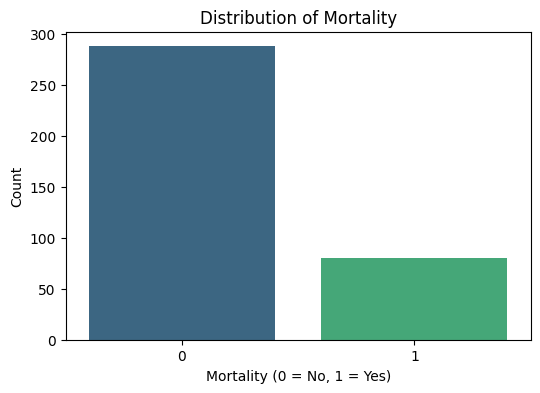

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Overview of the dataset
print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Mortality', data=data, palette='viridis')
plt.title("Distribution of Mortality")
plt.xlabel("Mortality (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



In [ ]:
data

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


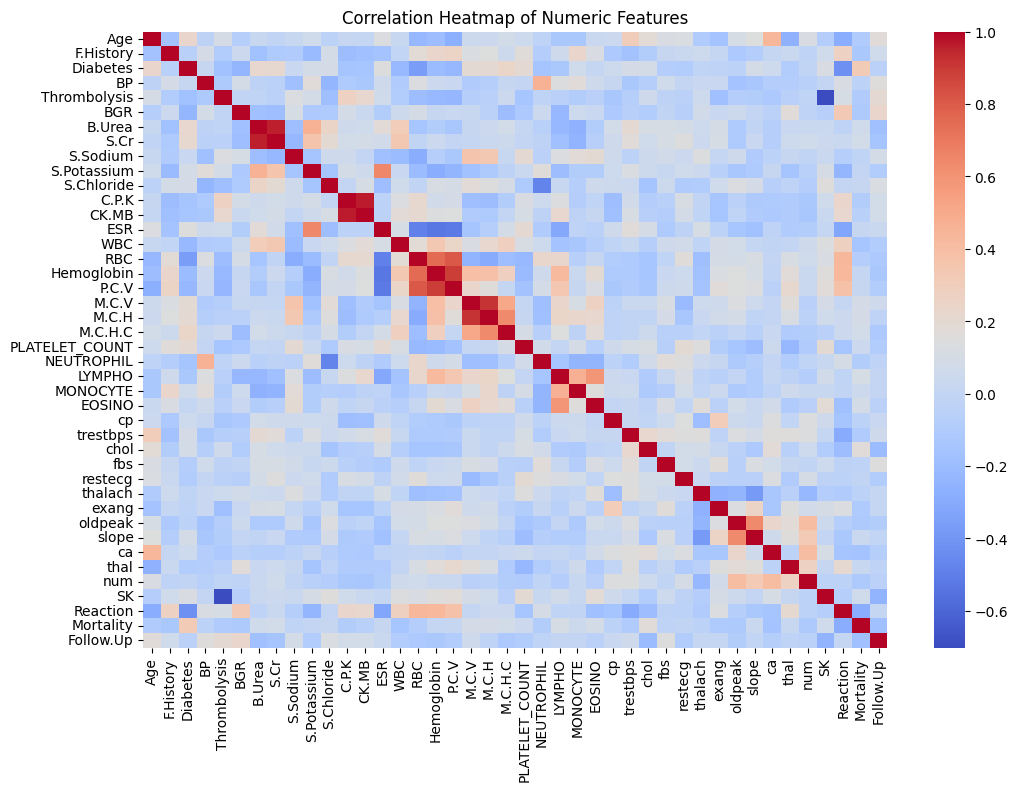

In [ ]:
# Correlation heatmap for numeric features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

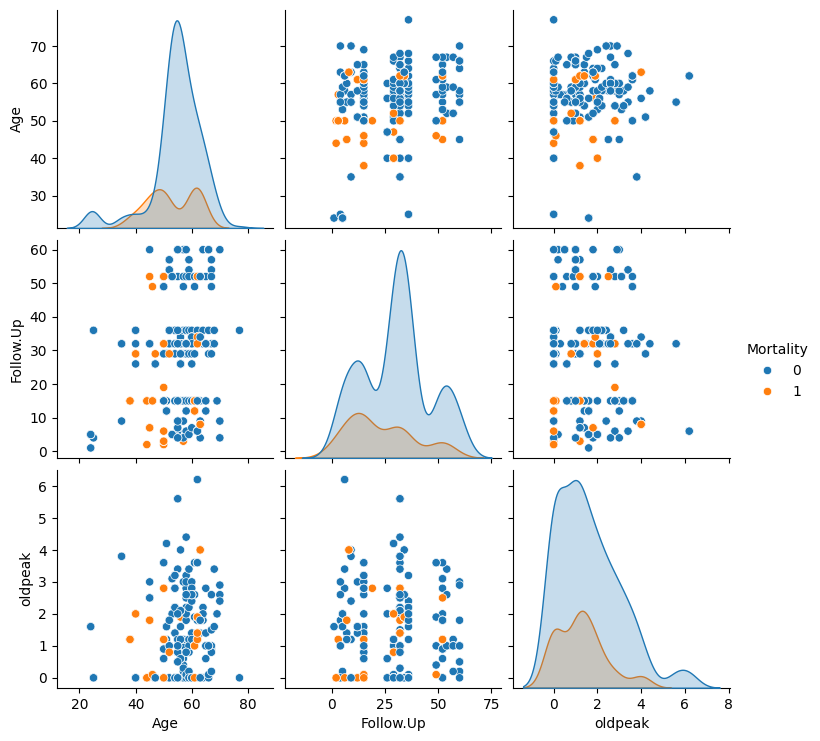

In [ ]:
# Pairplot for selected numeric features (adjusting for compatibility)
selected_features = ['Age', 'Follow.Up', 'oldpeak', 'Mortality']  # Ensure these are numeric
clean_data = data[selected_features].dropna()  # Drop rows with missing values for these features
sns.pairplot(clean_data, hue='Mortality', diag_kind='kde')
plt.show()

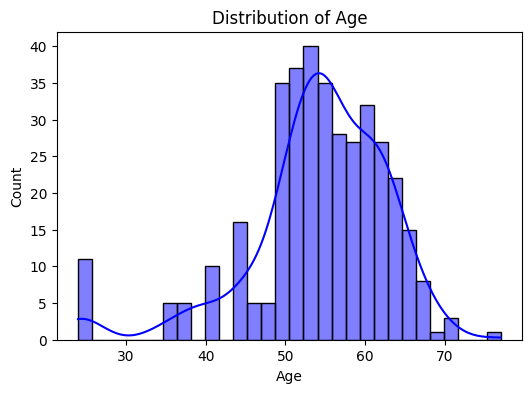

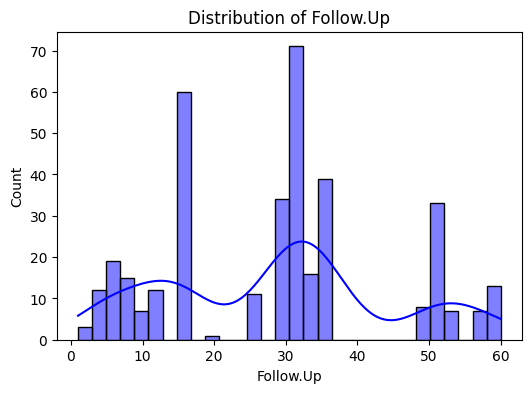

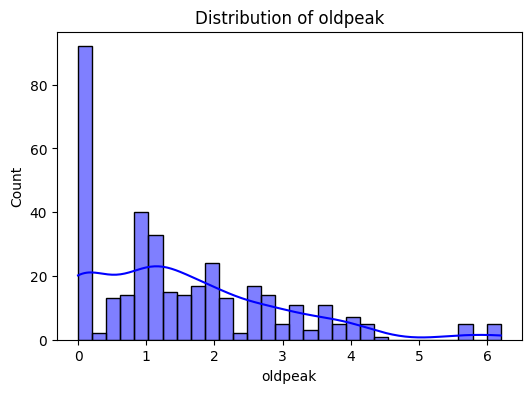

In [ ]:
# Distribution of a few key numeric features
key_features = ['Age', 'Follow.Up', 'oldpeak']
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

<ipython-input-36-609ad39ea317>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mortality', y=feature, data=data, palette='Set2')


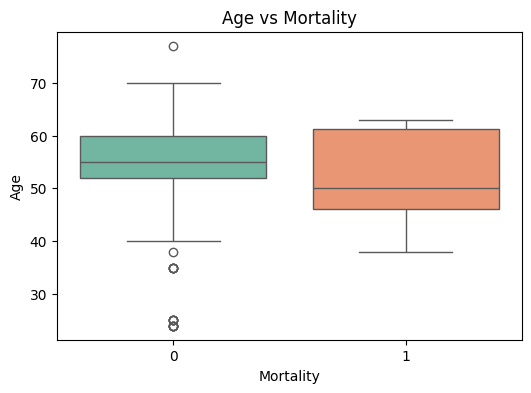

<ipython-input-36-609ad39ea317>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mortality', y=feature, data=data, palette='Set2')


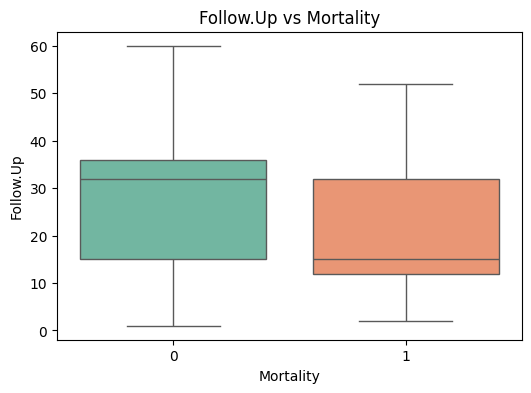

<ipython-input-36-609ad39ea317>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mortality', y=feature, data=data, palette='Set2')


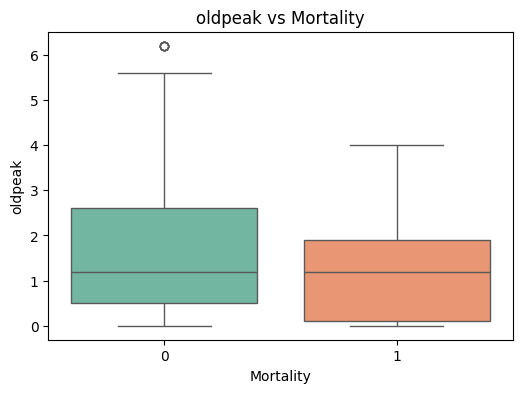

In [ ]:
# Boxplots to compare features against Mortality
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Mortality', y=feature, data=data, palette='Set2')
    plt.title(f"{feature} vs Mortality")
    plt.xlabel("Mortality")
    plt.ylabel(feature)
    plt.show()

In [ ]:
# Load the dataset
data = pd.read_csv("heart_fail.csv")

# Handle missing values by dropping rows with missing data
data.dropna(inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define target and features
target = 'Mortality'
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Random Forest for Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
important_features = [features[i] for i in np.argsort(importances)[-10:]]  # Top 10 features

# Select important features
X_train_selected = X_train[:, np.argsort(importances)[-10:]]
X_test_selected = X_test[:, np.argsort(importances)[-10:]]

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)


# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance of the Best Model
print("\nTop Features and Their Importances:")
best_feature_importances = best_rf_model.feature_importances_
for feature, importance in zip(important_features, best_feature_importances):
    print(f"{feature}: {importance:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.94      0.94      0.94        17

    accuracy                           0.97        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.97      0.97        74

Confusion Matrix:
[[56  1]
 [ 1 16]]
Accuracy Score: 0.972972972972973

Top Features and Their Importances:
WBC: 0.0995
oldpeak: 0.0479
Diabetes: 0.0950
ca: 0.0545
trestbps: 0.0738
Follow.Up: 0.0857
thalach: 0.1161
Age.Group: 0.1050
Age: 0.1299
chol: 0.1925


In [ ]:
important_features

['WBC',
 'oldpeak',
 'Diabetes',
 'ca',
 'trestbps',
 'Follow.Up',
 'thalach',
 'Age.Group',
 'Age',
 'chol']

What This Code Does:

	1.	Feature Selection:
	•	Identifies the top 10 most important features using the initial Random Forest model.
	•	Retains only these features for training and testing.
	2.	Hyperparameter Tuning:
	•	Performs grid search on Random Forest hyperparameters (e.g., n_estimators, max_depth).
	•	Uses cross-validation to find the best combination of hyperparameters.
	3.	Model Evaluation:
	•	Provides metrics: accuracy, precision, recall, F1-score, and a confusion matrix.
	•	Displays the most important features and their contributions to the final model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np


# Second round of model fitting
# Load the updated dataset with new variables
data = pd.read_csv("heart_fail.csv")

# Handle missing values by dropping rows with missing data
data.dropna(inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define target and features
target = 'Mortality'
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial Random Forest for Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
important_features = [features[i] for i in np.argsort(importances)[-10:]]  # Top 10 features

# Select important features
X_train_selected = X_train[:, np.argsort(importances)[-10:]]
X_test_selected = X_test[:, np.argsort(importances)[-10:]]

# Perform 4-fold cross-validation with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=4,  # 4-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Perform cross-validation on the variable-selected model (Top 10 variables)
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=4, scoring='accuracy')
print("\n4-Fold Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


# Feature Importance of the Best Model
print("\nTop Features and Their Importances:")
best_feature_importances = best_rf_model.feature_importances_
for feature, importance in zip(important_features, best_feature_importances):
    print(f"{feature}: {importance:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.94      0.94      0.94        17

    accuracy                           0.97        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.97      0.97        74

Confusion Matrix:
[[56  1]
 [ 1 16]]
Accuracy Score: 0.972972972972973

4-Fold Cross-Validation Scores: [0.95945946 0.93243243 1.         0.98630137]
Mean Cross-Validation Accuracy: 0.9695483154387264

Top Features and Their Importances:
WBC: 0.0995
oldpeak: 0.0479
Diabetes: 0.0950
ca: 0.0545
trestbps: 0.0738
Follow.Up: 0.0857
thalach: 0.1161
Age.Group: 0.1050
Age: 0.1299
chol: 0.1925


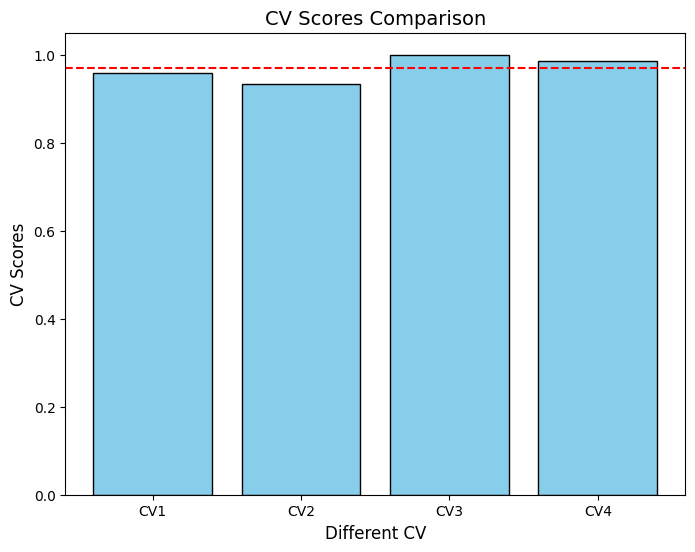

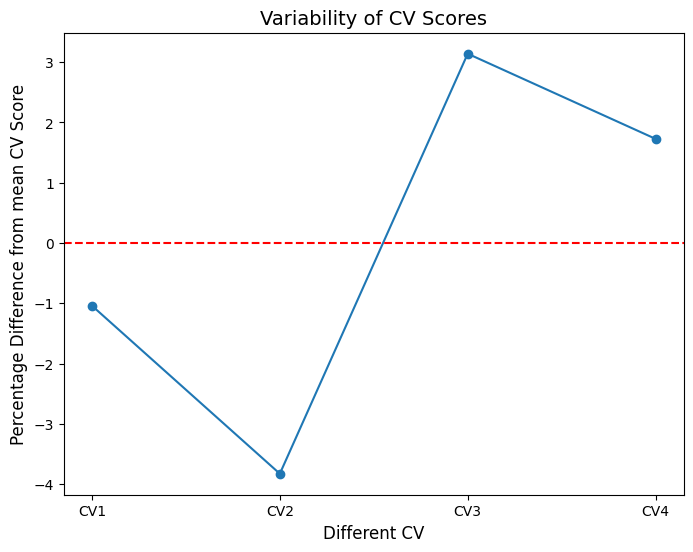

In [ ]:
### Plots for Results

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
categories = ["CV1", "CV2", "CV3", "CV4"]
plt.bar(categories, cv_scores, color='skyblue', edgecolor='black')

plt.axhline(y = np.mean(cv_scores), color='red', linestyle='--')

plt.xlabel('Different CV', fontsize=12)
plt.ylabel('CV Scores', fontsize=12)
plt.title('CV Scores Comparison', fontsize=14)

plt.show()

percentage = (cv_scores - np.mean(cv_scores)) / np.mean(cv_scores) * 100


plt.figure(figsize=(8, 6))
categories = ["CV1", "CV2", "CV3", "CV4"]
plt.plot(categories, percentage, linestyle='-', marker='o')
plt.axhline(y = 0, color='red', linestyle='--')

plt.xlabel('Different CV', fontsize=12)
plt.ylabel('Percentage Difference from mean CV Score', fontsize=12)
plt.title('Variability of CV Scores', fontsize=14)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too fe

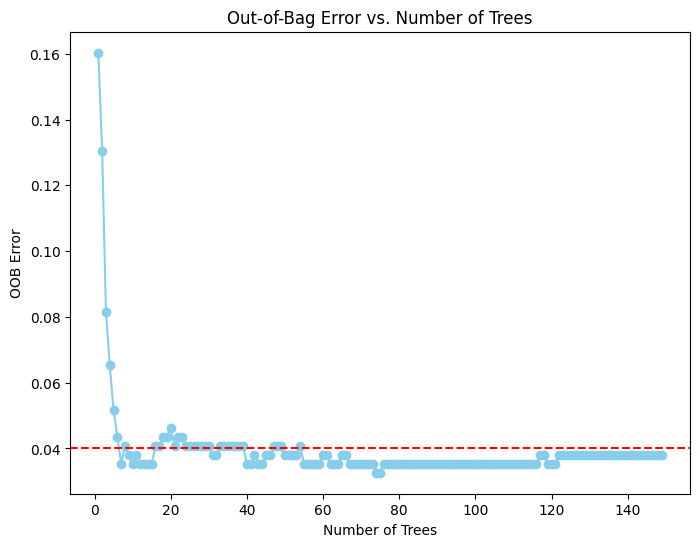

In [ ]:
oob_error = []
for n_estimators in range(1, 150):
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    rf.fit(X, y)
    oob_error.append(1 - rf.oob_score_)

# Plot OOB error
plt.figure(figsize=(8, 6))
plt.plot(range(1, 150), oob_error, marker='o', color='skyblue')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Out-of-Bag Error vs. Number of Trees')
plt.axhline(y = 0.04, color='red', linestyle='--')
plt.show()

In [ ]:

grid_search.best_params_['n_estimators']

### Using OOB we again prove that using 100 trees in our random forest model is reasonable

100